In [1]:
import pandas as pd
from bertopic import BERTopic
from nltk.corpus import stopwords
import nltk
import os

os.environ["TOKENIZERS_PARALLELISM"] = "false" 

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_json('News_Category_Dataset.json', lines=True)

# Remove stopwords from dataset
df['short_description'] = df['short_description'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))

# Extract 100000 samples of short_description and category for Bertopic
docs = df['short_description'].tolist()[:50000]
cat = df['category'].tolist()[:50000]

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, nr_topics=21)

# Fit BERTopic model and extract topics
topics, _ = topic_model.fit_transform(docs)

/Users/francesco/miniconda3/envs/ispr/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-04-10 22:31:27,254 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 1563/1563 [00:48<00:00, 32.51it/s]
2024-04-10 22:32:18,825 - BERTopic - Embedding - Completed ✓
2024-04-10 22:32:18,825 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-10 22:32:39,066 - BERTopic - Dimensionality - Completed ✓
2024-04-10 22:32:39,067 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-10 22:40:54,275 - BERTopic - Cluster - Completed ✓
2024-04-10 22:40:54,278 - BERTopic - Representation - Extrac

In [2]:

# Recreate dataframe for counting unique categories per topic
df = pd.DataFrame({'Document': docs, 'Category': cat, 'Topic': topics})

df = df.groupby('Topic')['Category'].nunique()



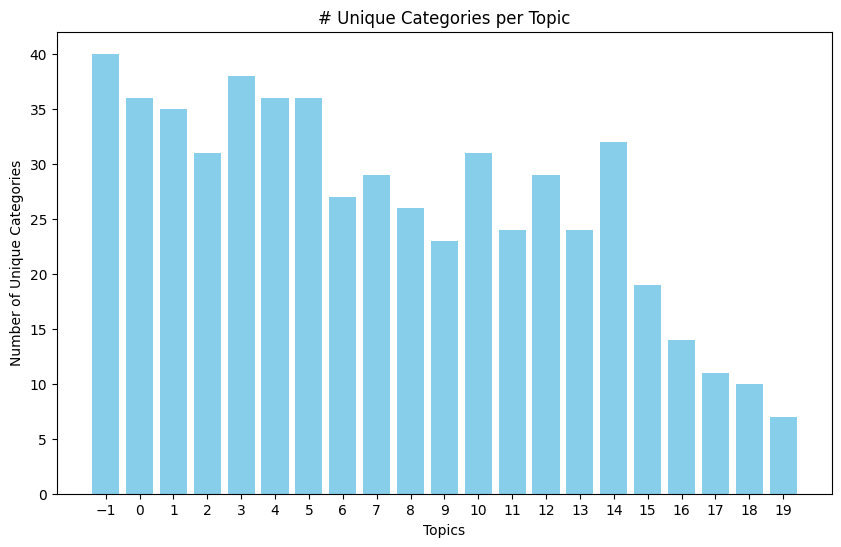

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.bar(df.index, df.values, color='skyblue')

plt.xticks(df.index)

plt.xlabel('Topics')
plt.ylabel('Number of Unique Categories')
plt.title('# Unique Categories per Topic')

plt.show()